**Question1**

**Mounting The google drive**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the libraries**

In [102]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import ensemble
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

**Loading the dataset**

In [103]:
data=loadmat("drive/MyDrive/annualrainfall.mat")
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'XR'])


**Making the Dataframe**

In [104]:
col =[]
for i in range(1,118):
  col.append(i)
dataset2=pd.DataFrame(data['XR'])
dataset=dataset2.transpose()
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356
0,0.719022,0.799972,1.116379,0.764488,0.923383,0.961330,0.558784,1.043538,2.035055,2.412407,1.020116,0.924422,0.411267,0.650088,0.555744,0.554543,2.877468,2.251094,2.765226,1.270153,1.197197,0.460204,0.668471,1.115757,0.853759,20.823211,12.842759,10.186025,3.183341,3.603291,3.697479,1.522895,0.377089,1.061575,1.685172,1.210726,1.138643,0.711443,20.567445,20.212346,...,18.456558,19.274612,19.248007,16.827436,19.116202,19.320298,9.572131,9.570068,11.274389,12.935580,12.699997,12.591806,9.572131,9.572131,9.679259,12.911017,12.990983,12.791377,12.691590,9.572131,12.226687,12.990302,12.990959,12.891180,12.791385,12.145931,12.566004,12.775478,12.835125,12.812802,13.020404,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784
1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.151360,4.426207,2.826211,2.506872,1.352286,0.986218,0.711302,0.710504,4.075968,4.490216,5.209842,5.144497,2.453501,1.342684,1.213666,1.390022,1.063347,17.347059,13.903304,15.428416,9.043351,7.070420,6.247996,2.793974,1.045290,1.244727,1.989387,1.260894,1.189412,2.382547,24.876621,22.071349,...,27.681964,30.274388,28.990351,25.026741,29.288620,29.365402,9.718852,9.718281,10.637300,11.678557,11.012375,10.680334,9.718852,9.718852,9.747912,10.654541,10.680327,10.680328,10.680328,9.718852,10.465386,10.679795,10.680367,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,11.486169,10.682952,10.680328,10.680328,11.080315,10.112830,10.391051,10.737137,9.187904,9.791919
2,5.115582,4.459389,5.715812,5.017730,3.644102,3.152490,1.511983,5.075399,7.259941,4.552429,2.268471,2.031172,1.322465,1.022786,1.522687,1.525320,5.151207,5.062471,4.150778,2.916549,2.198392,1.306540,0.957963,1.034741,1.330071,20.172346,15.009085,15.966569,5.793411,5.338131,5.632151,4.311718,2.543007,2.662746,1.228444,1.809276,1.818422,4.705132,21.223444,22.134132,...,16.150828,24.475677,22.107674,20.198222,23.634674,23.165600,7.917213,7.912404,8.883139,9.987368,9.468898,9.213939,7.917213,7.917213,7.952365,9.183067,9.213934,9.213934,9.213934,7.917213,8.924048,9.213560,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.685181,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733
3,0.509786,0.649587,1.357004,0.584740,0.878721,0.927881,0.002060,1.601084,2.431932,2.139452,0.971898,1.070565,0.634705,0.125983,0.001367,0.001229,2.210642,2.152020,2.268938,1.991877,1.592787,0.676388,0.371480,0.177228,0.091759,12.951422,8.423454,6.669177,2.495540,1.961912,2.005421,1.569623,0.675735,0.975794,0.505696,1.093725,1.047559,0.465532,20.586835,21.068474,...,16.785243,17.156677,16.683811,14.877937,16.722553,16.800944,8.425410,8.423881,9.312998,10.345126,10.103128,9.977870,8.425410,8.425410,8.471533,9.945200,9.984425,9.984426,9.984426,8.425410,9.635902,9.983663,9.984426,9.984426,9.977869,9.984426,9.984426,9.984426,9.984426,9.984426,10.281640,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062
4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.332660,1.851805,3.144972,3.733844,2.330140,3.008399,0.967045,0.606373,0.328647,0.328080,3.187606,2.727223,5.767491,6.425890,6.443947,0.807959,0.807527,0.490327,0.387966,9.705484,7.695050,6.489703,4.324101,5.530998,7.122308,3.181993,2.170939,0.780239,0.481825,0.481873,0.809099,0.590865,11.900142,13.083758,...,26.309828,33.316699,29.036056,27.236831,30.983271,30.627263,10.491803,10.491053,11.345654,12.290508,11.533414,11.156565,10.481147,10.491803,10.510888,11.138133,11.156557,11.156557,11.156557,10.491803,11.007949,11.156123,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.919070,11.156557,11.156557,11.156557,11.543451,10.

**1)**

In [105]:
total_Rainfall=[]
for i in dataset.index:
  temp=0
  for j in dataset.loc[i].index:
    temp+=dataset.loc[i][j]
  total_Rainfall.append(temp)
print(total_Rainfall)

[2419.465228639483, 2512.018017693012, 2667.3579935300177, 2327.246610178812, 2306.637001265207, 2882.2129629777723, 2470.835171593261, 2728.3810917724127, 2754.9666117965326, 2986.5096970215805, 2408.6962981344973, 2539.737067116151, 2441.7848363907733, 2963.2814766172264, 2397.7983783677096, 3128.907906858707, 3422.483790411933, 2380.860393122387, 2954.389754705925, 2499.2954387094387, 3036.340705066674, 3002.07381611354, 2669.4012956839697, 3035.0998919769263, 2772.480997819239, 2953.1910224010353, 2929.477441308379, 2612.4499143564794, 2608.0470645605415, 2705.3873818060547, 2962.960819416481, 2842.0111439051566, 3162.758240118927, 3007.877600824126, 2754.958347399245, 3097.1660076086005, 2740.697210480506, 3147.414964821617, 2604.6617042183525, 2822.244287179386, 2478.552340234218, 3089.880221541789, 2936.7968787767713, 2875.61456333345, 2895.1578041404864, 2937.6394559811847, 2864.855990702624, 3136.4609615576214, 3042.346747841196, 2893.7114867978394, 2157.393965288263, 2445.674

**Calculating mean and STD**

In [106]:
m=np.mean(total_Rainfall)
print(m)
s=np.std(total_Rainfall)
print(s)

2731.5638988707724
266.8989059344519


**2)**

In [107]:
labels=[]
for i in total_Rainfall:
  if i>m+s:
    labels.append(1)
  elif i<m-s:
    labels.append(-1)
  else:
    labels.append(0)

**3)**

In [108]:
X =[]
for i in range(0,357):
  X.append(i)
X_train=dataset.loc[:99,:]
Y_train=labels[:100]
X_test=dataset.loc[100:,:]
Y_test=labels[100:]
decision_tree= DecisionTreeClassifier(random_state=0, max_depth = 10)
val = RepeatedStratifiedKFold(n_splits=5, random_state=1)
scores = cross_val_score(decision_tree, X_train, Y_train, scoring='accuracy', cv=val)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
decision_tree=decision_tree.fit(X_train,Y_train)
print(decision_tree.score(X_test,Y_test))

Accuracy: 0.563 (0.100)
0.5


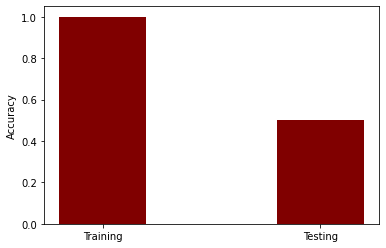

In [109]:
array=["Training","Testing"]
values=[decision_tree.score(X_train,Y_train),decision_tree.score(X_test,Y_test)]
plt.bar(array, values, color ='maroon',width = 0.4)
plt.ylabel("Accuracy")
plt.show()

**4)**

In [110]:
random_forest=ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
val = RepeatedStratifiedKFold(n_splits=5, random_state=1)
scores = cross_val_score(random_forest, X_train, Y_train, scoring='accuracy', cv=val)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
random_forest=random_forest.fit(X_train,Y_train)
print(random_forest.score(X_test,Y_test))

Accuracy: 0.688 (0.060)
0.7777777777777778


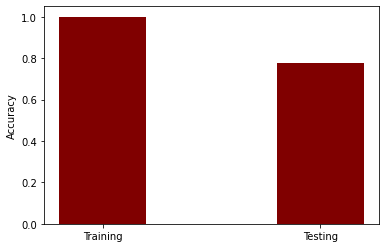

In [111]:
array=["Training","Testing"]
values=[random_forest.score(X_train,Y_train),random_forest.score(X_test,Y_test)]
plt.bar(array, values, color ='maroon',width = 0.4)
plt.ylabel("Accuracy")
plt.show()

**Yes the results improved**

In [112]:
Rainfall_mean=[]
Rainfall_sd=[]
for i in dataset2.index:
  temp=0
  for j in dataset2.loc[i].index:
    Rainfall_mean.append(np.mean(dataset2.loc[i]))
    Rainfall_sd.append(np.mean(dataset2.loc[i]))
print(Rainfall_mean)
print(Rainfall_sd)

[2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927, 2.8794784634634927,

**5)**

In [113]:
labels=np.zeros(shape=(357,118))
for i in dataset2.index:
  for j in dataset2.loc[i].index:
    if dataset2.loc[i].loc[j]>Rainfall_mean[i]+Rainfall_sd[i]:
      labels[i][j]=1
    elif dataset2.loc[i].loc[j]<Rainfall_mean[i]-Rainfall_sd[i]:
      labels[i][j]=-1
    else:
      labels[i][j]=0
print(labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]]


**6)**

In [114]:
for i in range(0,357):
  print("Predicting for Location "+str(i)+":")
  print(" ")
  X_train=dataset.loc[:99,:]
  X_train=X_train.drop(columns=i)
  Y_train=labels[i][:100]
  X_test=dataset.loc[100:,:]
  X_test=X_test.drop(columns=i)
  Y_test=labels[i][100:]
  decision_tree= DecisionTreeClassifier(random_state=0, max_depth = 10)
  val = RepeatedStratifiedKFold(n_splits=5, random_state=1)
  scores = cross_val_score(decision_tree, X_train, Y_train, scoring='accuracy', cv=val)
  print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
  decision_tree=decision_tree.fit(X_train,Y_train)
  print(decision_tree.score(X_test,Y_test))
  array=decision_tree.feature_importances_
  idx = (-array).argsort()[:10]
  print("Top 10 locations:")
  for j in idx:
    if j>i:
      print("Location "+str(j+1))
      print(array[j])
    else:
      print("Location "+str(j+1))
      print(array[j])
  print(" ")

Streaming output truncated to the last 5000 lines.
0.0
Location 238
0.0
Location 237
0.0
Location 236
0.0
 
Predicting for Location 165:
 
Accuracy: 0.929 (0.058)
1.0
Top 10 locations:
Location 194
0.8798076923076923
Location 137
0.1201923076923077
Location 1
0.0
Location 242
0.0
Location 241
0.0
Location 240
0.0
Location 239
0.0
Location 238
0.0
Location 237
0.0
Location 236
0.0
 
Predicting for Location 166:
 
Accuracy: 1.000 (0.000)
0.8333333333333334
Top 10 locations:
Location 1
0.0
Location 243
0.0
Location 242
0.0
Location 241
0.0
Location 240
0.0
Location 239
0.0
Location 238
0.0
Location 237
0.0
Location 236
0.0
Location 244
0.0
 
Predicting for Location 167:
 
Accuracy: 1.000 (0.000)
0.7777777777777778
Top 10 locations:
Location 1
0.0
Location 243
0.0
Location 242
0.0
Location 241
0.0
Location 240
0.0
Location 239
0.0
Location 238
0.0
Location 237
0.0
Location 236
0.0
Location 244
0.0
 
Predicting for Location 168:
 
Accuracy: 1.000 (0.000)
0.7777777777777778
Top 10 locations:

**7)**

In [115]:
for i in range(0,357):
  print("Predicting for Location "+str(i)+":")
  print(" ")
  X_train=dataset.loc[:99,:]
  X_train=X_train.drop(columns=i)
  Y_train=labels[i][:100]
  X_test=dataset.loc[100:,:]
  X_test=X_test.drop(columns=i)
  Y_test=labels[i][100:]
  random_forest=ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
  val = RepeatedStratifiedKFold(n_splits=5, random_state=1)
  scores = cross_val_score(random_forest, X_train, Y_train, scoring='accuracy', cv=val)
  print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
  random_forest = random_forest.fit(X_train,Y_train)
  print(random_forest.score(X_test,Y_test))
  array=random_forest.feature_importances_
  idx = (-array).argsort()[:10]
  print("Top 10 locations:")
  for j in idx:
    if j>i:
      print("Location "+str(j+1))
      print(array[j])
    else:
      print("Location "+str(j))
      print(array[j])
  print(" ")

Streaming output truncated to the last 5000 lines.
0.0522195183485506
Location 136
0.05211726172591826
Location 162
0.04385749385749386
Location 220
0.04275827759619431
 
Predicting for Location 165:
 
Accuracy: 0.932 (0.052)
1.0
Top 10 locations:
Location 191
0.07161905623148099
Location 162
0.06997663562670248
Location 164
0.06839426967146721
Location 136
0.05832472541531498
Location 193
0.05570667039524924
Location 194
0.05202506332970815
Location 106
0.047463934135953414
Location 109
0.043139450968989475
Location 220
0.039389232012359006
Location 219
0.03912685634756876
 
Predicting for Location 166:
 
Accuracy: 1.000 (0.000)
0.8333333333333334
Top 10 locations:
Location 0
0.0
Location 243
0.0
Location 242
0.0
Location 241
0.0
Location 240
0.0
Location 239
0.0
Location 238
0.0
Location 237
0.0
Location 236
0.0
Location 244
0.0
 
Predicting for Location 167:
 
Accuracy: 1.000 (0.000)
0.7777777777777778
Top 10 locations:
Location 0
0.0
Location 243
0.0
Location 242
0.0
Location 241
0

**Question 2**

In [116]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X = np.concatenate([x_train, x_test])
Y = np.concatenate([y_train, y_test])
X = X.reshape(-1, 28 * 28).astype("float32") / 255.0
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

**Decision Tree**

In [119]:
depth=[20,30,40,50]
for i in depth:
  decision_tree= DecisionTreeClassifier(random_state=0, max_depth = i)
  val = RepeatedStratifiedKFold(n_splits=10, random_state=1)
  scores = cross_val_score(decision_tree, X_train, Y_train, scoring='accuracy', cv=val)
  print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
  decision_tree=decision_tree.fit(X_train,Y_train)
  print(decision_tree.score(X_test,Y_test))

Accuracy: 0.868 (0.005)
0.8730285714285714
Accuracy: 0.866 (0.005)
0.8714285714285714
Accuracy: 0.866 (0.005)
0.8712571428571428
Accuracy: 0.866 (0.005)
0.8721142857142857


**Random Forest**

In [121]:
depth=[20,30,40,50]
for i in depth:
  random_forest=ensemble.RandomForestClassifier(n_estimators=20,max_depth=i)
  val = RepeatedStratifiedKFold(n_splits=10, random_state=1)
  scores = cross_val_score(random_forest, X_train, Y_train, scoring='accuracy', cv=val)
  print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
  random_forest=random_forest.fit(X_train,Y_train)
  print(random_forest.score(X_test,Y_test))

Accuracy: 0.957 (0.003)
0.9567428571428571
Accuracy: 0.958 (0.003)
0.9574857142857143
Accuracy: 0.958 (0.003)
0.9563428571428572
Accuracy: 0.958 (0.003)
0.9572
